In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
#nnos permite separar el dta set 
from sklearn.model_selection import train_test_split

In [127]:
df = pd.read_csv('datos_seguro.csv')
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [128]:
df.describe()

,edad,compra
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


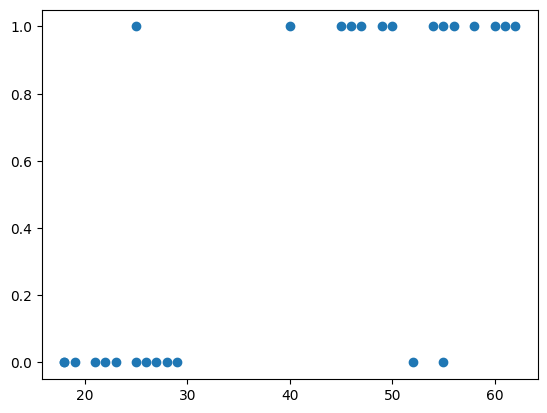

In [129]:
plt.scatter(df['edad'],df['compra'])

In [130]:
X_entrena , X_prueba, y_entrena , y_prueba =train_test_split(df[['edad']],df[['compra']], test_size=0.2 )

In [131]:
X_prueba

,edad
16,25
10,18
6,55
1,25
15,55
20,21


In [132]:
modelo = LogisticRegression()
modelo.fit(X_entrena,y_entrena)

/workspaces/se_24_python/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [133]:
modelo.score(X_prueba,y_prueba)

0.6666666666666666

In [134]:
datos_nuevos = pd.DataFrame({'edad': [20,25,30,35,40,45,50,55,60,65]})
datos_nuevos.head()

,edad
0,20
1,25
2,30
3,35
4,40


In [135]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.98581231, 0.01418769],
       [0.9584244 , 0.0415756 ],
       [0.88436825, 0.11563175],
       [0.71730829, 0.28269171],
       [0.45706465, 0.54293535],
       [0.21832068, 0.78167932],
       [0.08480413, 0.91519587],
       [0.02982562, 0.97017438],
       [0.01009646, 0.98990354],
       [0.00337245, 0.99662755]])

In [136]:
prob_compar = probabilidades[:,1]
prob_compar

array([0.01418769, 0.0415756 , 0.11563175, 0.28269171, 0.54293535,
       0.78167932, 0.91519587, 0.97017438, 0.98990354, 0.99662755])

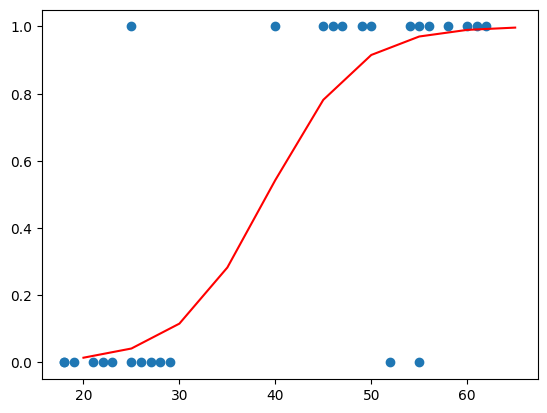

In [137]:
plt.scatter(df['edad'], df['compra'])
plt.plot(datos_nuevos['edad'], prob_compar, color='red')